[-5.72355896 -7.87497441 -7.87497911 ... -7.92581908 -7.92580687
 -7.92579466]


"\nfig1, ax1 = plt.subplots()\npoints1 = sum([ax.plot([], [], 'o', c=c)\n           for c in colors], [])\n\nlines1 = sum([ax.plot([], [], '-', c=c)\n             for c in colors], [])\n\nlines1.set_data(final_pos[len(final_pos)-1,:,0], final_pos[len(final_pos)-1,:,1])\n"

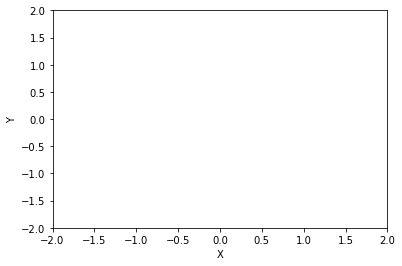

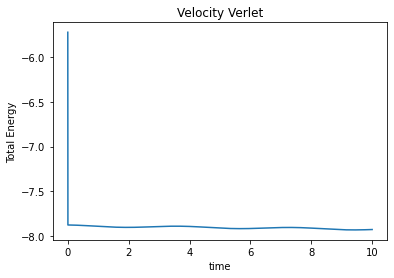

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue May 17 02:14:46 2022

@author: pulkitkukreja
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

G = 1
#G = 0.9
m = 1

#Radius of the circle
R = 1

#Number of bodies

N = 4

#pos : two dimensional array with positions of all the particles as rows

#Initialize the positions of particles on a circle
def ini_pos(nBodies):
    pos = []
    for i in range(nBodies):
        pos.append([R*np.cos(i*2*np.pi/nBodies), R*np.sin(i*2*np.pi/nBodies)])
    pos = np.array(pos)
    pos[0,0] = pos[0,0] + 0.01
    return pos
#returns a two dimensional array of positions of all particles (also rounded off) 


#vel: two dimensional array with velocities of all the bodies as rows
def ini_vel(nBodies):
    sum_sin = 0
    #Calculates the summation
    for j in range(1,nBodies):
        sum_sin = sum_sin + (1/(np.sin(j*np.pi/nBodies)))
    
    #Magnitude of the vel
    vel_mag = np.sqrt((G*m/(4*R))*sum_sin)
    
    #vel_mag = 0
    vel = []
    #Loop over every body
    for i in range(nBodies):
        vel.append([-1*vel_mag*np.sin(i*2*np.pi/nBodies), vel_mag*np.cos(i*2*np.pi/nBodies)])
    
    return np.array(vel), vel_mag
#returns a two dimensional array of velocities of all bodies (also rounded off) 
   
        

#Total force on body i due to rest of the bodies
#i: index of the body (just used for reference)

def total_force(pos,i):
    #Calculates the summation
    sum_sin=0
    for j in range(1,N):
        sum_sin = sum_sin + (1/(np.sin(j*np.pi/N)))
    for_mag = -1*(G*(m**2)/(4*(R**2)))*sum_sin
    uni_vec = pos[i]/np.linalg.norm(pos[i])
    return for_mag*uni_vec

#Potential energy of the ith body
def pot_en(pos,i):
    a = 0
    #Considering due to all other bodies
    for j in range(N):
        if i!=j: #Exclude the body itself
            a+= -G*(m**2)/np.linalg.norm(pos[j]-pos[i])
    return a

#Kinetic energy of the ith body
def kin_en(vel,i):
    return 0.5*m*(np.linalg.norm(vel[i])**2)
"""

Finally integrate the equations of motion

final_pos: 3D array with elements as 2D array of positions 
of particles at corresponding time steps

final_vel: 3D array with elements as 2D array of velocities 
of particles at corresponding time steps

"""
dt = 0.001
fin_time = 10
nMult = int(fin_time/dt)

#The time steps over which integration is done
time_arr = np.linspace(0, fin_time, nMult+1)

#Initialize position and velocity 3D arrays
final_pos = np.zeros([nMult+1, N, 2])
final_pos[0] = ini_pos(N)
final_vel = np.zeros([nMult+1, N, 2])
final_vel[0], vel_mag = ini_vel(N)

#calculate the initial total energy of the every particle
tot_en = np.zeros([nMult+1, N])
#Loop over bodies
in_en = []
for b in range(N):
    in_en.append(kin_en(final_vel[0], b) + pot_en(final_pos[0], b))
tot_en[0] = in_en

tot_en_sys = np.zeros(nMult+1)
#total energy of the sys at the first time step
tot_en_sys[0] = np.sum(tot_en[0])
#Loop over time array
for t in range(len(time_arr)-1):    
    #Loop over bodies
    for k in range(N):
        
        #Euler Method
        #final_vel[t+1,k,:] = final_vel[t,k,:] + (total_force(final_pos[t],k)/m)*dt #+ (total_force(final_pos[t+1],k)/m)*(dt/2)
        #final_pos[t+1,k,:] = final_pos[t,k,:] + final_vel[t,k,:]*dt #+ (total_force(final_pos[t],k)/m)*((dt**2)/2)+ (total_force(final_pos[t],k)/m)*((dt**2)/2)
        
        
        #Velocity Verlet
        final_pos[t+1,k,:] = final_pos[t,k,:] + final_vel[t,k,:]*dt + (total_force(final_pos[t],k)/m)*((dt**2)/2)+ (total_force(final_pos[t],k)/m)*((dt**2)/2)        
        final_vel[t+1,k,:] = final_vel[t,k,:] + (total_force(final_pos[t],k)/m)*(dt/2) + (total_force(final_pos[t+1],k)/m)*(dt/2)
        
        #total energy of the kth body at (t+1)th time step
        tot_en[t+1, k] = kin_en(final_vel[t+1], k) + pot_en(final_pos[t+1], k)
        
        
        #final_pos[t+1,k,:] = R*final_pos[t+1,k,:]/np.linalg.norm(final_pos[t+1,k,:])
    tot_en_sys[t+1] = np.sum(tot_en[t+1])

print(tot_en_sys)
     
fig, ax = plt.subplots()
colors = plt.cm.jet(np.linspace(0,1,N))
#points = sum([ax.plot(final_pos[0,c,0],final_pos[0,c,1], 'o', c=colors[c]) for c in range(len(colors))],[])
points = sum([ax.plot([], [], 'o', c=c)
           for c in colors], [])

lines = sum([ax.plot([], [], '-', c=c)
             for c in colors], [])
#lines, = ax.plot(final_pos[0,:,0],final_pos[0,:,1], '-')

ax.set_ylim(-2*R, 2*R)
ax.set_xlim(-2*R, 2*R)
ax.set_xlabel("X")
ax.set_ylabel("Y")
#ax.grid()

#initialize the animation
def init_a():
    for ln, pt in zip(lines, points):
        ln.set_data(final_pos[0,:,0],final_pos[0,:,1])
        pt.set_data(final_pos[0,:,0],final_pos[0,:,1])
    return lines, points

def animate(i):
    for pt in points:
        pt.set_data(final_pos[i,:,0], final_pos[i,:,1])

    for ln in lines:
        x,y = final_pos[:i].T
        ln.set_data(x, y)    
    return points,

anim = animation.FuncAnimation(fig, animate, init_func=init_a,
frames=10000, interval=40, blit=False)


plt.figure()
plt.plot(time_arr, tot_en_sys)
plt.title("Velocity Verlet")
plt.xlabel("time")
plt.ylabel("Total Energy")

"""
fig1, ax1 = plt.subplots()
points1 = sum([ax.plot([], [], 'o', c=c)
           for c in colors], [])

lines1 = sum([ax.plot([], [], '-', c=c)
             for c in colors], [])

lines1.set_data(final_pos[len(final_pos)-1,:,0], final_pos[len(final_pos)-1,:,1])
"""